In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
from collections import Counter

In [20]:
inputDF = pd.read_csv("C:/Users/nitis/Downloads/SJSU/SJSU Spring'19/256/Project/seattle/listings.csv")

In [21]:
inputDF=inputDF[['id','longitude','latitude','instant_bookable','security_deposit','neighbourhood','cleaning_fee',
                 'extra_people','maximum_nights','minimum_nights','host_id','host_response_time',
                 'zipcode','room_type','accommodates',
                 'bathrooms','bedrooms','beds','cancellation_policy','price']]

In [22]:
#Replacing NaN values with 0

inputDF.fillna(0, inplace=True)

Price Column

In [23]:
#Extracting prices from the dataset
price = inputDF['price']
prices=[]

#Cleaning the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#Replacing the price column with the new column created above
inputDF['price']=prices

Cleaning Fee

In [24]:
#Removing columns with zero value
inputDF=inputDF[inputDF.cleaning_fee != 0]

#Extracting the cleaning_fee from the dataset
cleaning_f = inputDF['cleaning_fee']
cleaningF=[]

#Cleaning the data to make it float
for f in cleaning_f:
    f=float(f[1:])
    cleaningF.append(f)

#Replacing the cleaning_fee column with the new column created above
inputDF['cleaning_fee']=cleaningF

Extra People

In [25]:
#Extracting extra_people from the dataset
extra_f = inputDF['extra_people']
extraPF=[]

#Cleaning the data to make it float
for f in extra_f:
    f=float(f[1:])
    extraPF.append(f)

#Replacing the extra_people column with the new column created above
inputDF['extra_people']=extraPF

Security Deposit

In [26]:
#Removing columns with zero value
inputDF=inputDF[inputDF.security_deposit != 0]

#Extracting secuirity deposit from the dataset
security_dep = inputDF['security_deposit']
Sec_D=[]

#Cleaning the data to make it float
for s in security_dep:
    s=float(s[1:].replace(',',''))
    Sec_D.append(s)

#Replacing the secuirty deposit column with the new column created above
inputDF['security_deposit']=Sec_D

In [27]:
#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
# inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()

,id,longitude,latitude,instant_bookable,security_deposit,neighbourhood,cleaning_fee,extra_people,maximum_nights,minimum_nights,host_id,host_response_time,zipcode,room_type,accommodates,bathrooms,bedrooms,beds,cancellation_policy,price
1,953595,-122.365666,47.639123,f,100.0,Queen Anne,40.0,0.0,90,2,5177328,within an hour,98119,Entire home/apt,4,1.0,1.0,1.0,strict,150.0
2,3308979,-122.369483,47.629724,f,1000.0,Queen Anne,300.0,25.0,30,4,16708587,within a few hours,98119,Entire home/apt,11,4.5,5.0,7.0,strict,975.0
4,278830,-122.372471,47.632918,f,700.0,Queen Anne,125.0,15.0,1125,1,1452570,within an hour,98119,Entire home/apt,6,2.0,3.0,3.0,strict,450.0
7,856550,-122.375856,47.640161,f,150.0,Queen Anne,25.0,0.0,7,2,4016632,within an hour,98119,Private room,2,1.0,1.0,1.0,strict,60.0
9,2493658,-122.366889,47.637492,f,100.0,Queen Anne,40.0,0.0,365,2,5177328,within an hour,98119,Entire home/apt,4,1.0,1.0,1.0,strict,150.0


In [30]:
from sklearn import ensemble
from sklearn import linear_model
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import preprocessing
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

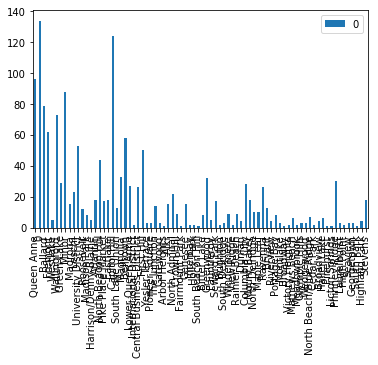

In [31]:
nb_counts = Counter(inputDF.neighbourhood)
tdf = pd.DataFrame.from_dict(nb_counts, orient='index')
tdf.plot(kind='bar')

In [32]:
#Getting feature encoding for categorical variables
n_dummies = pd.get_dummies(inputDF.neighbourhood)
rt_dummies = pd.get_dummies(inputDF.room_type)
xcl_dummies = pd.get_dummies(inputDF.cancellation_policy)
hr_dummies = pd.get_dummies(inputDF.host_response_time)
# convert boolean column to a single boolean value indicating whether this listing has instant booking available
ib_dummies = pd.get_dummies(inputDF.instant_bookable, prefix="instant")
ib_dummies = ib_dummies.drop('instant_f', axis=1)

#Replacing the old columns with our new one-hot encoded ones
alldata = pd.concat((inputDF.drop(['neighbourhood', \
    'room_type', 'cancellation_policy', 'instant_bookable','host_response_time'], axis=1), \
    n_dummies.astype(int), rt_dummies.astype(int), \
    xcl_dummies.astype(int), ib_dummies.astype(int)), \
    axis=1)
allcols = alldata.columns
alldata.head(5)

,id,longitude,latitude,security_deposit,cleaning_fee,extra_people,maximum_nights,minimum_nights,host_id,zipcode,...,Westlake,Windermere,Yesler Terrace,Entire home/apt,Private room,Shared room,flexible,moderate,strict,instant_t
1,953595,-122.365666,47.639123,100.0,40.0,0.0,90,2,5177328,98119,...,0,0,0,1,0,0,0,0,1,0
2,3308979,-122.369483,47.629724,1000.0,300.0,25.0,30,4,16708587,98119,...,0,0,0,1,0,0,0,0,1,0
4,278830,-122.372471,47.632918,700.0,125.0,15.0,1125,1,1452570,98119,...,0,0,0,1,0,0,0,0,1,0
7,856550,-122.375856,47.640161,150.0,25.0,0.0,7,2,4016632,98119,...,0,0,0,0,1,0,0,0,1,0
9,2493658,-122.366889,47.637492,100.0,40.0,0.0,365,2,5177328,98119,...,0,0,0,1,0,0,0,0,1,0


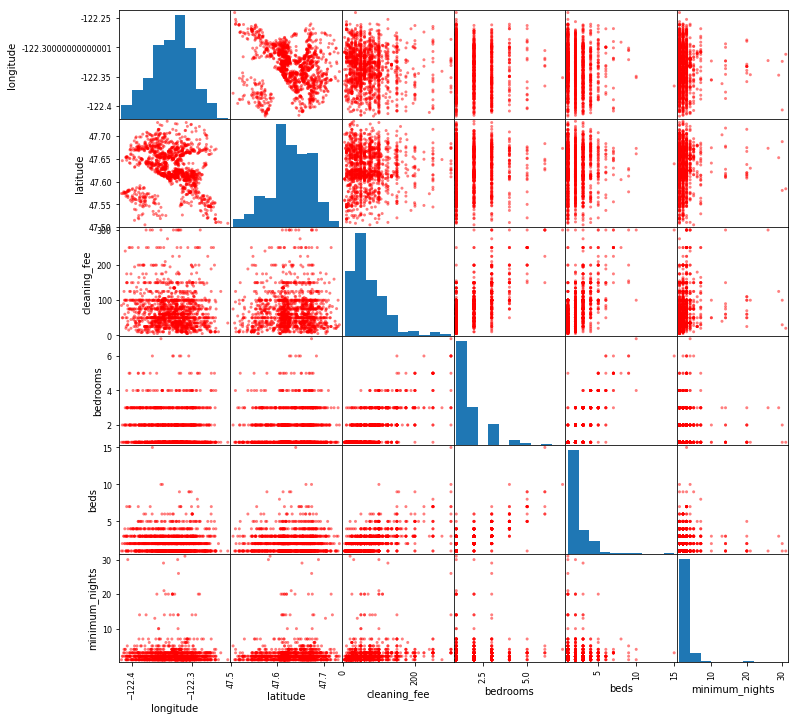

In [33]:
scattercols = ['longitude','latitude', 'cleaning_fee', 'bedrooms', 'beds','minimum_nights']
axs = pd.plotting.scatter_matrix(alldata[scattercols],
                        figsize=(12, 12), c='red')

C:\Users\nitis\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.501052e-18
  overwrite_a=True).T


Text(0, 0.5, 'Median Absolute Error')

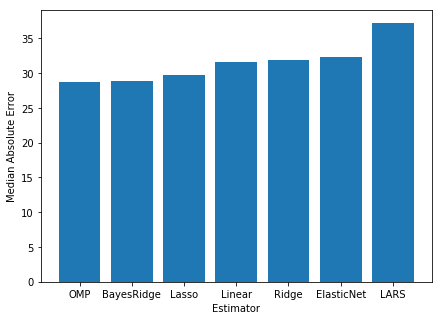

In [34]:
rs = 1
ests = [ linear_model.LinearRegression(), linear_model.Ridge(),
        linear_model.Lasso(), linear_model.ElasticNet(),
        linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit(), 
        linear_model.LassoLars()]
ests_labels = np.array(['Linear', 'Ridge', 'Lasso', 'ElasticNet', 'BayesRidge', 'OMP', 'LARS'])
errvals = np.array([])

X_train, X_test, y_train, y_test = train_test_split(alldata.drop(['price'], axis=1),
                                                    alldata.price, test_size=0.2, random_state=20)

for e in ests:
    e.fit(X_train, y_train)
    this_err = metrics.median_absolute_error(y_test, e.predict(X_test))
    #print "got error %0.2f" % this_err
    errvals = np.append(errvals, this_err)

pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Median Absolute Error')

In [35]:
n_est = [5000]


tuned_parameters = {
    "n_estimators": [ 5000 ],
    "max_depth" : [ 2, 4 ],
    "learning_rate": [0.01, 0.05],
     "min_samples_split" : [0.8],
    "min_samples_leaf": [3],
    "max_features":[1],
   "loss" : [ 'ls', 'lad' ]
}

# pd.DataFrame(y_train)
gbr = ensemble.GradientBoostingRegressor()
clf = GridSearchCV(gbr, cv=3, param_grid=tuned_parameters,
        scoring='neg_median_absolute_error')
preds = clf.fit(X_train, y_train)
best = clf.best_estimator_
best

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='lad', max_depth=2, max_features=1,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=0.8, min_weight_fraction_leaf=0.0,
             n_estimators=5000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
y_train=pd.DataFrame(y_train)

In [37]:
abs(clf.best_score_)

23.784776968509487

In [38]:
type(X_test)

pandas.core.frame.DataFrame

Text(0, 0.5, 'Least Absolute Deviation')

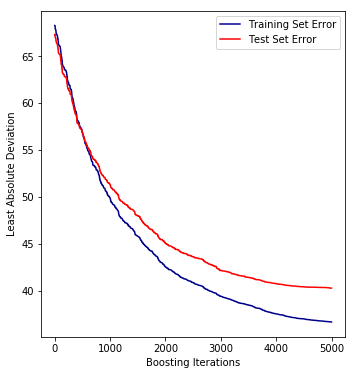

In [39]:
test_score = np.zeros(n_est, dtype=np.float64)

train_score = best.train_score_
for i, y_pred in enumerate(best.staged_predict(X_test)):
    test_score[i] = best.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(5000), train_score, 'darkblue', label='Training Set Error')
plt.plot(np.arange(5000), test_score, 'red', label='Test Set Error')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Least Absolute Deviation')

Text(0.5, 1.0, 'Variable Importance')

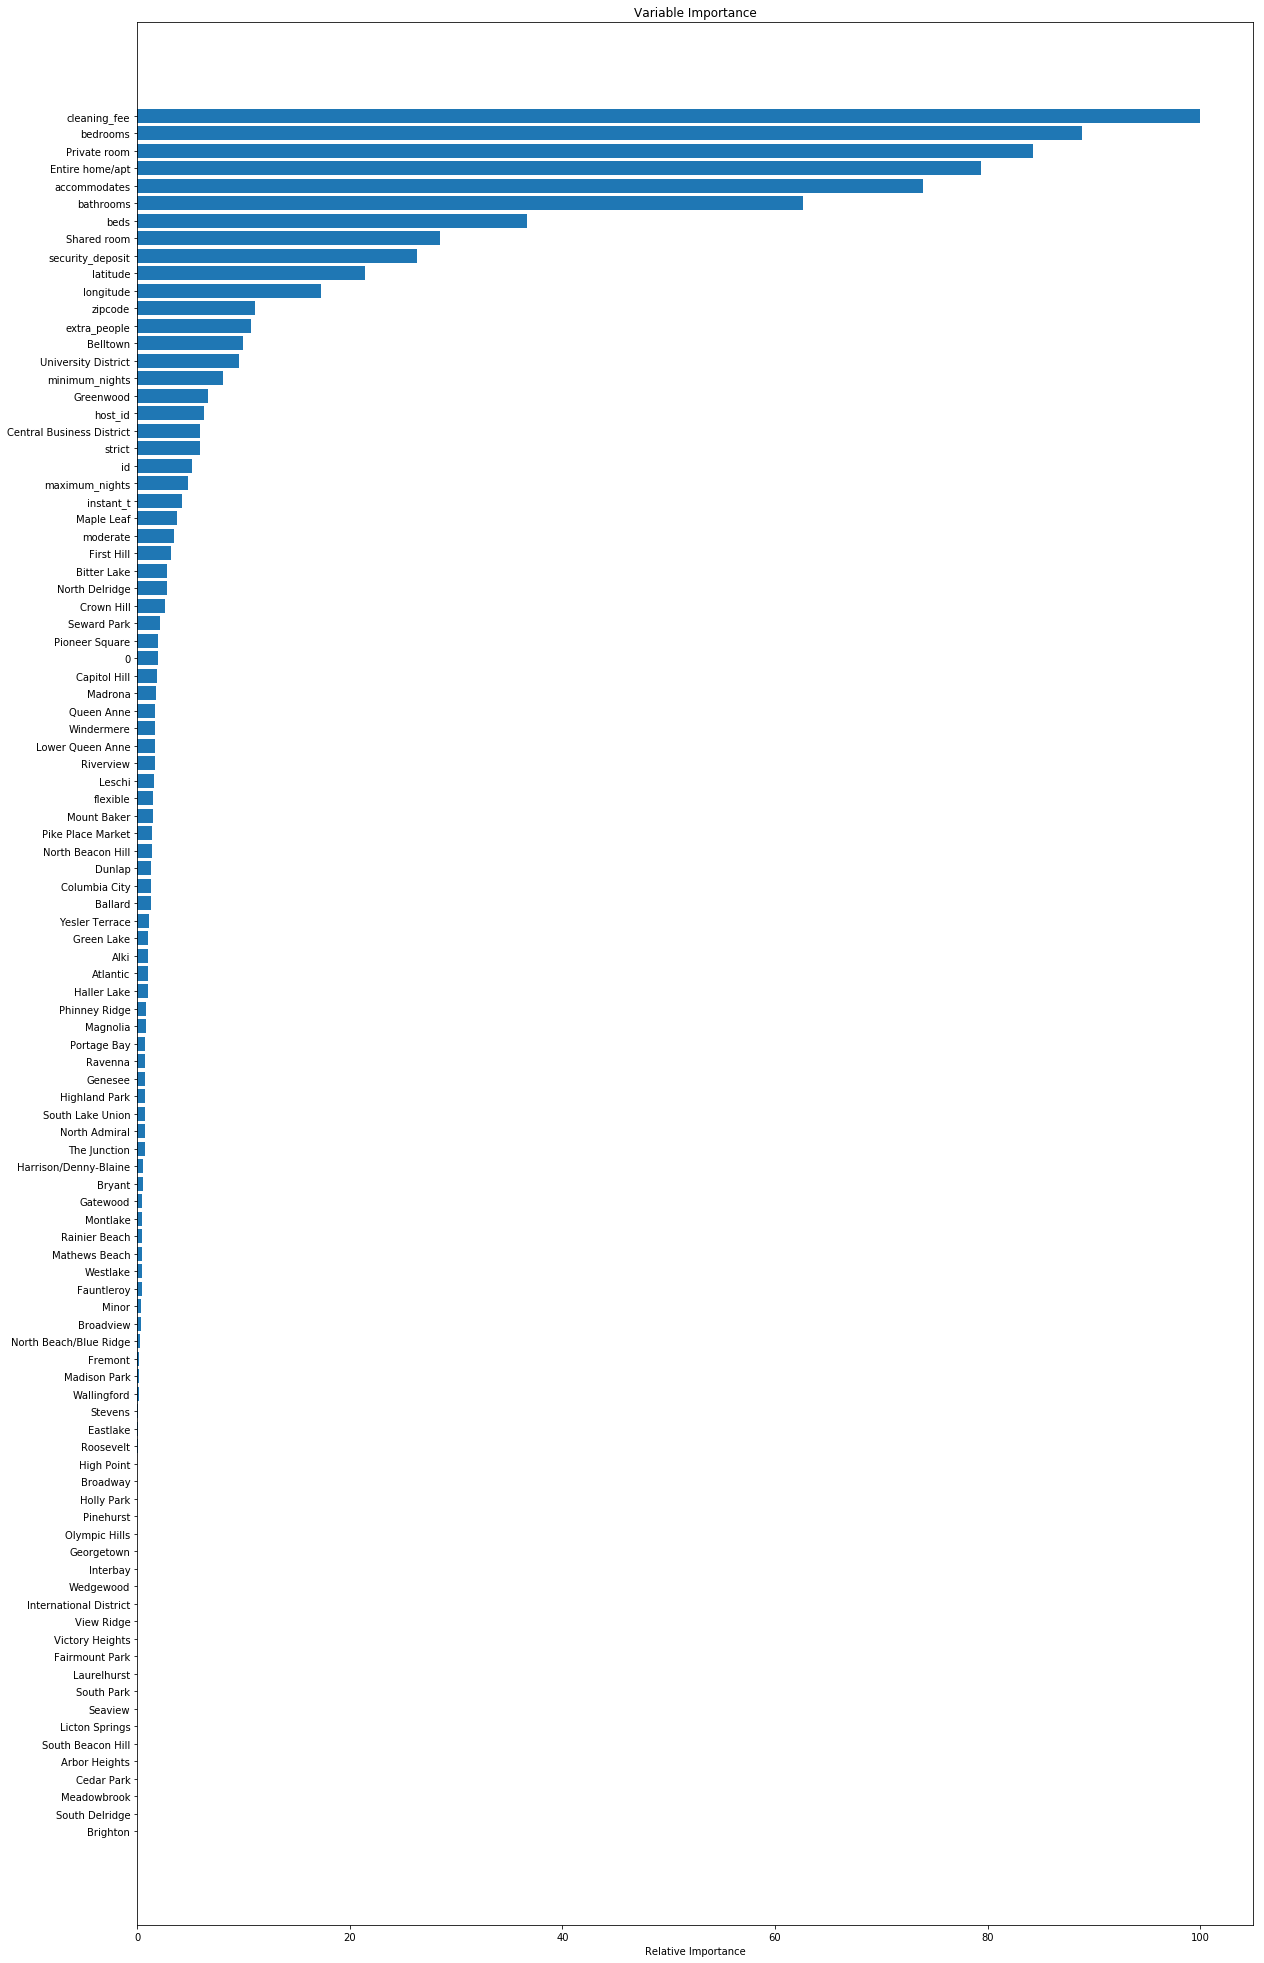

In [40]:
feature_importance = clf.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pvals = feature_importance[sorted_idx]
pcols = X_train.columns[sorted_idx]
plt.figure(figsize=(20,35))
plt.barh(pos, pvals, align='center')
plt.yticks(pos, pcols)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')